# 神经网络的学习

## 损失函数

In [8]:
# 均方误差
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#损失函数值越小越准确
print(mean_squared_error(np.array(y1),np.array(t)))
print(mean_squared_error(np.array(y2),np.array(t)))

0.09750000000000003
0.5975


In [7]:
#交叉熵误差
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7
    #加入 delta，避免出现log(0)  -inf
    return -np.sum(t * np.log(y + delta))

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y1),np.array(t)))
print(cross_entropy_error(np.array(y2),np.array(t)))

0.510825457099338
2.302584092994546


In [15]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:

    def __init__(self):
        self.W = np.random.randn(2,3) #用高斯分布进行初始化

    def pridect(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.pridect(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t) #交叉熵误差
        return loss
    
x = np.array([0.6, 0.9]) #输入数据
t = np.array([0, 0, 1]) #测试数据

net = simpleNet()
p = net.pridect(x)
print("权重参数:",net.W)
print("预测数据",p)
print("最大值的索引",np.argmax(p))
print("交叉熵误差",net.loss(x, t))

f = lambda w: net.loss(x, t) #定义新函数是可以使用lamda表达式
dW = numerical_gradient(f, net.W)

print("梯度",dW)

权重参数: [[-0.7016211   1.07147642  0.47905245]
 [-0.10310072  0.28499488 -0.51663362]]
预测数据 [-0.51376331  0.89938124 -0.17753879]
最大值的索引 1
交叉熵误差 1.5368853908874287
梯度 [[ 0.09218697  0.37878296 -0.47096993]
 [ 0.13828046  0.56817443 -0.70645489]]


# 学习算法的实现

## 前提

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为`学习`。神经网络的学习分成下面四个步骤

## 步骤1（mini-batch）

从训练数据中随机选取一部分数据，这部分数据称为`mini-batch`。我们的目标是减小mini-batch的损失函数的值

## 步骤2（计算梯度）

为了减小mini-batch的损失函数的值，需要求各个权重参数的梯度。梯度表示损失函数的值减小最多的方向

## 步骤3（更新参数）

将权重参数沿梯度方向进行微小更新。

## 步骤4（重复）

重复步骤1、步骤2、步骤3

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7874166666666667, 0.7941
train acc, test acc | 0.8783333333333333, 0.8836
train acc, test acc | 0.8997, 0.9037
train acc, test acc | 0.90895, 0.9115
train acc, test acc | 0.91505, 0.9192
train acc, test acc | 0.9206, 0.9231
train acc, test acc | 0.9244, 0.9274
train acc, test acc | 0.9285333333333333, 0.9296
train acc, test acc | 0.93115, 0.9337
train acc, test acc | 0.9346333333333333, 0.9348
train acc, test acc | 0.9366833333333333, 0.9368
train acc, test acc | 0.9397166666666666, 0.939
train acc, test acc | 0.9412833333333334, 0.9408
train acc, test acc | 0.9432, 0.9409
train acc, test acc | 0.9451833333333334, 0.9428
train acc, test acc | 0.9474, 0.9438


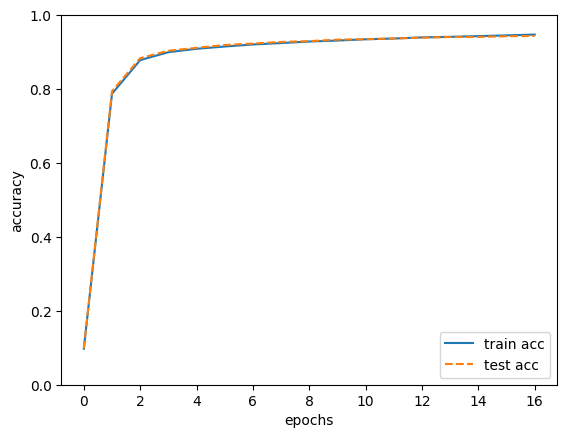

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()